### Linear Regression with TensorFlow

In [8]:
# Import the necessary libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
import tensorflow as tf
import matplotlib.patches as mpatches
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
print(tf.__version__)

2.12.0


Let's define the independent variable.

In [3]:
X = np.arange(0.0, 5.0, 0.1)
X

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9])

Let's assign some values as slope and intercept by ourselves.

In [4]:
# Defining slope and intercept

a = 1
b = 0

# Calculate the dependent variable 
Y = a*X + b

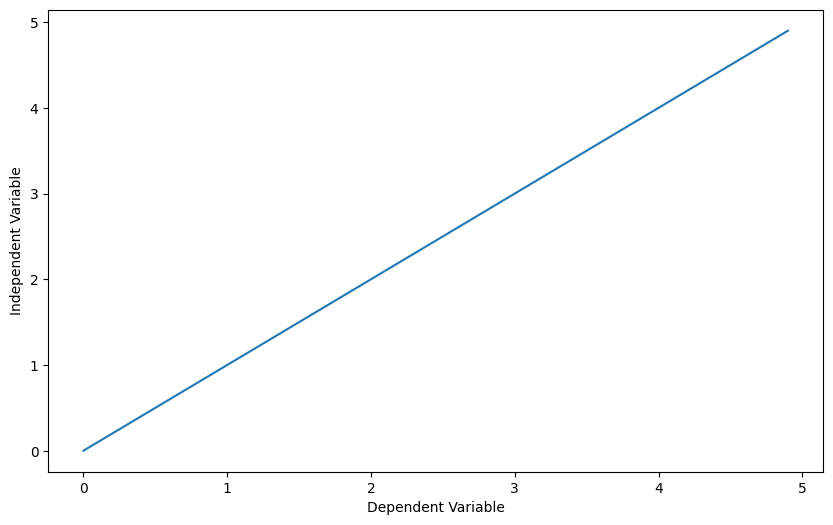

In [5]:
# Plot the data
plt.plot(X, Y)
plt.xlabel("Dependent Variable")
plt.ylabel("Independent Variable")
plt.show()

OK... but how can we see this concept of linear relations with a more meaningful point of view?

Simple linear relations were used to try to describe and quantify many observable physical phenomena, the easiest to understand are speed and distance traveled:


$$Distance Traveled = Speed \times Time + Initial Distance$$

$$Speed = Acceleration \times Time + Initial Speed$$


They are also used to describe properties of different materials:


$$Force = Deformation \times Stiffness$$

$$Heat Transfered = Temperature Difference \times Thermal Conductivity$$

$$Electrical Tension (Voltage) = Electrical Current \times Resistance$$

$$Mass =  Volume \times Density$$


When we perform an experiment and gather the data, or if we already have a dataset and we want to perform a linear regression, what we will do is adjust a simple linear model to the dataset, we adjust the "slope" and "intercept" parameters to the data the best way possible, because the closer the model comes to describing each ocurrence, the better it will be at representing them.

So let's look at how is regression performed using tensorflow?


Get the data

In [6]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2023-04-26 16:59:20--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.03s   

2023-04-26 16:59:20 (2.71 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



<h2>Understanding the Data</h2>

<h3><code>FuelConsumption.csv</code>:</h3>
We have downloaded a fuel consumption dataset, <b><code>FuelConsumption.csv</code></b>, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. <a href="http://open.canada.ca/data/en/dataset/98f1a129-f628-4ce4-b24d-6f16bf24dd64?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDL0120ENSkillsNetwork954-2022-01-01">Dataset source</a>

-   **MODELYEAR** e.g. 2014
-   **MAKE** e.g. Acura
-   **MODEL** e.g. ILX
-   **VEHICLE CLASS** e.g. SUV
-   **ENGINE SIZE** e.g. 4.7
-   **CYLINDERS** e.g 6
-   **TRANSMISSION** e.g. A6
-   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
-   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
-   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
-   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0


In [9]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Lets say we want to use linear regression to predict Co2Emission of cars based on their engine size. So, lets define X and Y value for the linear regression, that is, train_x and train_y:


In [10]:
train_x = np.asanyarray(df[['ENGINESIZE']])
train_y = np.asanyarray(df[['CO2EMISSIONS']])

First, we initialize the variables <b>a</b> and <b>b</b>, with any random guess, and then we define the linear function:


In [11]:
a = tf.Variable(20.0)
b = tf.Variable(30.2)


def h(x):
   y = a*x + b
   return y

In [12]:
a

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=20.0>

Define a loss function.

In [13]:
def loss_object(y,train_y) :
    return tf.reduce_mean(tf.square(y - train_y))
    # Below is a predefined method offered by TensorFlow to calculate loss function
    #loss_object = tf.keras.losses.MeanSquaredLogarithmicError()

Now we are ready to start training and run the graph. We use GradientTape to calculate gradients:

In [15]:
learning_rate = 0.01

train_data = []
loss_values = []
a_values = []
b_values = []

# Steps of looping through all our data to update the parameters
training_epochs = 200

# train_model

for epoch in range(training_epochs):
  with tf.GradientTape() as tape:
    y_predicted = h(train_x)
    loss_value = loss_object(train_y, y_predicted)
    loss_values.append(loss_value)

    # get gradients
    gradients = tape.gradient(loss_value, [b,a])
        
    # compute and adjust weights
    a_values.append(a.numpy())
    b_values.append(b.numpy())
    b.assign_sub(gradients[0]*learning_rate)
    a.assign_sub(gradients[1]*learning_rate)
    if epoch % 5 == 0:
        train_data.append([a.numpy(), b.numpy()])

Lets plot the loss values to see how it has changed during the training:


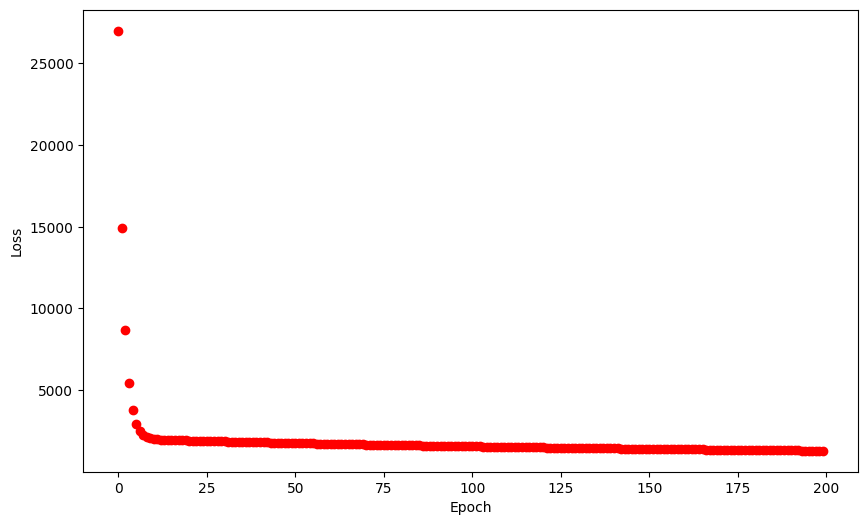

In [16]:
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.plot(loss_values, 'ro')

Lets visualize how the coefficient and intercept of line has changed to fit the data:

The green dots are the data points, the red lines are created using the a and b coefficients during training, and the black line is the line we use to model the relationship with the final/last coefficients.


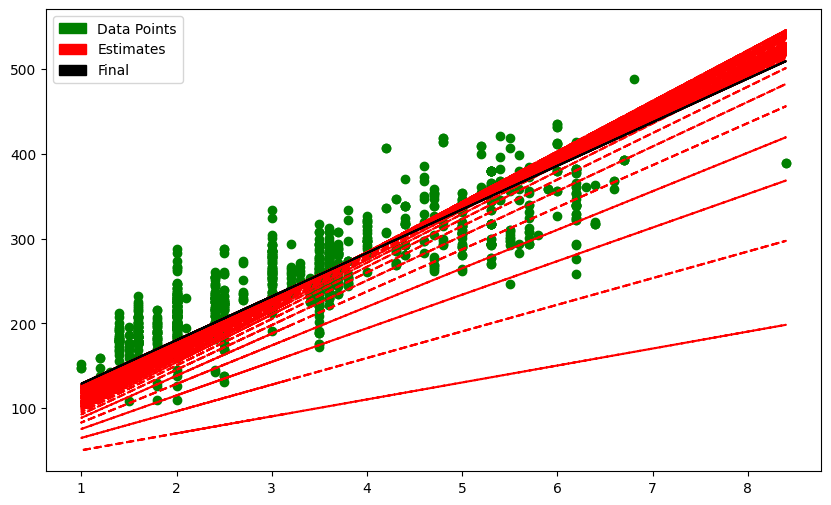

In [17]:
plt.scatter(train_x, train_y, color='green')
for a,b in zip(a_values[0:len(a_values)], b_values[0:len(b_values)]):
    plt.plot(train_x,a*train_x+b, color='red', linestyle='dashed')
plt.plot(train_x,a_values[-1]*train_x+b_values[-1], color='black')

final = mpatches.Patch(color='Black', label='Final')
estimates = mpatches.Patch(color='Red', label='Estimates')
data = mpatches.Patch(color='Green', label='Data Points')

plt.legend(handles=[data, estimates, final])

plt.show()